
# Descripteurs d'images ( MORAVEC + HARRIS )

1.   LABCHRI Amayas

2.   KOULAL Yidhir Aghiles



In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from numpy import linalg as LA
from collections import deque
from math import exp

In [ ]:
#lecture de l'image
image =cv.imread('/content/drive/MyDrive/Colab Notebooks/image2.png',0)

0
(320, 452)


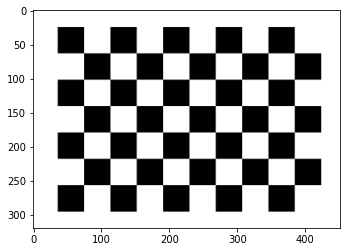

In [ ]:
print(image[60][49])
print(image.shape)
plt.imshow(image,cmap='gray')

Detection de points avec le detecteur MORAVEC
Définition de paramètres


In [ ]:
# paramétres de MORAVEC
S= 2  # Seuil
F= 3  # Taille de la fenêtre
U= [[1,0],[1,1],[0,1],[-1,1],[-1,0],[-1,-1],[0,-1],[1,-1]]# Déplacements
FN=[[-1,-1],[-1,0],[-1,1],[0,-1],[0,0],[0,1],[1,-1],[1,0],[1,1]] #a et b de la fenêtre(3*3) 
  

Calcul de la carte de coins (cornerness map)

In [ ]:
def v(i,j,U,FN,image):
  nu=0
  V = np.zeros(8)
  for Udep in U:
    u1,v1 = Udep
    #print("U = ",u1," V = ",v1)
    var=0
    for FNdep in FN:
      a1,b1=FNdep
      #print("a = ",a1," b = ",b1)
      #print(i+u1+b1)
      x1=i+u1+a1
      y1=j+v1+b1
      x2=i+a1
      y2=j+b1
      var=var+( image[x1][y1] - image[x2][y2] )**2
      #print(var)

    V[nu]=var  
    nu=nu+1           
    
  return np.min(V)


La catre des coins

In [ ]:
def CarteDesCoins(image):
  C = np.zeros_like(image)
  for i in range(2,C.shape[0]-2):
    for j in range(2,C.shape[1]-2):
      C[i, j] = v(i,j,U,FN,image)
  return C

Le detecteur de MORAVEC



In [ ]:
def MoravecAlgorithm(image,seuil, U,FN):
  Moravec_image = np.zeros_like(image)
  Cmin = np.zeros_like(image)
  Cmin  = CarteDesCoins(image)
  for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
      if Cmin[i,j] >=seuil:
        Moravec_image[i,j] = 1
  return Moravec_image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()


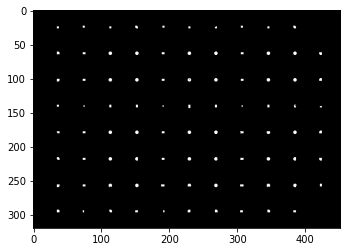

In [ ]:
image_moravec = MoravecAlgorithm(image,S,U,FN)
plt.imshow(image_moravec, cmap="gray")

Affichage de l'image en RGB

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


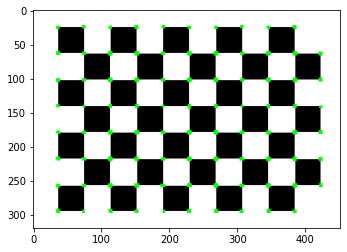

In [ ]:
imgg=image.copy()
# Detecter les points avec Moravec
image_moravec = MoravecAlgorithm(image,S,U,FN)
# Dilater l'image pour mieux visualiser les points de coins
dst1 = cv.dilate(image_moravec,None)
# Créer une image RVB
img1=np.zeros((imgg.shape[0],imgg.shape[1],3))
img1[:,:,0]=imgg
img1[:,:,1]=imgg
img1[:,:,2]=imgg
# Dessiner les points sur l'image RVB
img1[dst1>0.01*dst1.max()]=[0,255,0]
plt.imshow(img1)

# Descripteurs Harris
D'abord calculer les valeurs et vecteurs propres comme vu en TD, puis appliquer l'agorithme de Harris

In [ ]:
A= [[-1,2,0],
    [0,3,4],
    [0,0,7]]
B=[[-1,2,2],
   [2,2,-1],
   [1,-2,1]]
val1, vec1 = LA.eig(A)
val2, vec2 = LA.eig(B)

In [ ]:
print(val1,'\n', vec1,'\n',val2)
print(val1[1])

[-1.  3.  7.] 
 [[1.         0.4472136  0.17407766]
 [0.         0.89442719 0.69631062]
 [0.         0.         0.69631062]] 
 [-3.  2.  3.]
3.0


Expliquer le résultat obtenu, et comparer avec le TD;  
Pourquoi les résultats sont-ils différents?

# Reponse:
les résultats sont différents par ce que:
- la fonction LA.eig() de python retourn des valeurs réels.
- dans le td on a le t qui apparitent a R, mais ici le t est remplacé mais les "ratios" sont identiques.

Text(0.5, 1.0, 'Gadiant Y')

<Figure size 432x288 with 0 Axes>

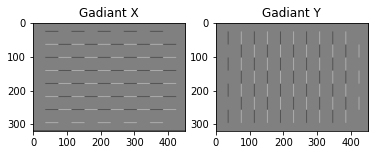

In [ ]:
def padding (image,value,reference_shape):
  return np.pad(image, reference_shape, mode='constant',constant_values=value)
def gradient_X(image):
  image_pad = padding(image, 0, [0,1]) # ajouter le pading à l'image (img)
  image_gradientX = np.zeros(image.shape)

  for i in range(image_pad.shape[0] - 1):
   for j in range (image_pad.shape[1] - 1):
     image_gradientX[i][j] = int(image_pad[i+1,j]) - int(image_pad[i][j])
  return image_gradientX

def gradient_Y(image):
  image_pad = padding(image, 0, [0,1])
  image_gradientY = np.zeros(image.shape)

  for i in range(image_pad.shape[0] - 1 ):
    for j in range(image_pad.shape[1] -1):
      image_gradientY[i][j] = int(image_pad[i, j+1])-int(image_pad[i][j])
  return image_gradientY  
Ix = gradient_X(image)
Iy = gradient_Y(image)
plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(Ix, cmap="gray")
axarr[0].set_title("Gadiant X") 
axarr[1].imshow(Iy, cmap="gray") 
axarr[1].set_title("Gadiant Y")  



In [ ]:
def harris(image ,F, S , sig):
  Harris_image = np.zeros_like(image)
  #calcul de gradient( par rapport a x et a y)
  Gx = gradient_X(image) 
  Gy = gradient_Y(image)
  Gxx = Gx * Gx
  Gyy = Gy * Gy
  Gyx = Gy * Gx

  #application du filtre gaussien
  G_Gxx = cv.GaussianBlur(Gxx,(F,F),sig)
  G_Gyy = cv.GaussianBlur(Gyy,(F,F),sig)
  G_Gyx = cv.GaussianBlur(Gyx,(F,F),sig)
  
  alpha=0.06
  # determinant
  detA = G_Gxx * G_Gyy - G_Gyx ** 2
  # trace
  traceA = G_Gxx + G_Gyy 
  # calcul de R  
  R = detA - alpha * traceA ** 2

  Harris_image = np.zeros_like(image)
  for i, rep in enumerate(R):
    for j, r in enumerate(rep):
      #si r > seuil alors le point est un coin
        if r > S:
    
            Harris_image[i, j] = 1

  
  #plt.imshow(Harris_image,cmap='gray')            
  return Harris_image


Affichage de l'image en GRAY

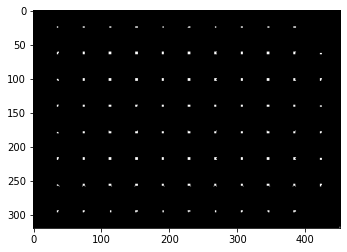

In [ ]:
# Detecter les points avec Harris avec S=2 et sigma = 10
h=harris(image ,3, 2 , 10)
plt.imshow(h,cmap='gray') 


Affichage de l'image en RVB

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


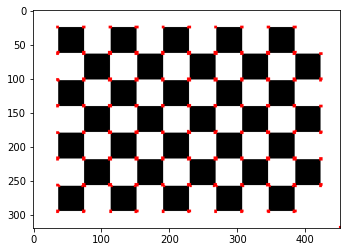

In [ ]:
img=image.copy()
# Detecter les points avec Harris avec S=2 et sigma = 10
h=harris(image ,3, 2 , 10)
# Dilater l'image pour mieux visualiser les points de coins
dst = cv.dilate(h,None)
# Créer une image RVB
img2=np.zeros((img.shape[0],img.shape[1],3))
img2[:,:,0]=img
img2[:,:,1]=img
img2[:,:,2]=img
# Dessiner les points sur l'image RVB
img2[dst>0.01*dst.max()]=[255,0,0]
plt.imshow(img2)

Comparaison avec OpenCV

On a eu le meme résultat avec la fonction cornerHarris d'OpenCV

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


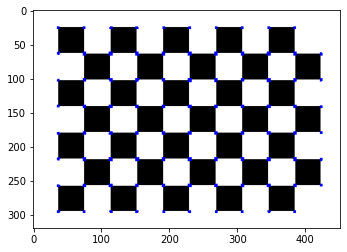

In [ ]:
img=image.copy()
# Detecter les points avec Harris
dst = cv.cornerHarris(img,2,3,0.04)
# Dilater l'image pour mieux visualiser les points de coins
dst = cv.dilate(dst,None)
# Créer une image RVB
img2=np.zeros((img.shape[0],img.shape[1],3))
img2[:,:,0]=img
img2[:,:,1]=img
img2[:,:,2]=img
# Dessiner les points sur l'image RVB
img2[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(img2)